In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
t = np.array(range(1850,2101))
def rhs(y, t,emis_t,kappa_l,Do,gamma_l,gamma_o,c_amp,rho_a,beta_l,beta_o,lamb,rho_o,rho_od,beta_od,kappa_o): 
    T_a,C_a,C_o,C_od,T_o = y
    eq1 = 1/kappa_l*(6.3*np.log(C_a/cina)-lamb*T_a-Do*(T_a-T_o))
    #1GTCO2 = 0.469 ppm
    eq2 = (emis_t[int(t)-1850]-(gamma_l+gamma_o)*eq1*(1+T_a*c_amp))/(1+rho_a*(beta_l))-beta_o*(rho_a*C_a-rho_o*C_o)
    diffusion_to_ocean = (rho_a*C_a - rho_o*C_o)
    diffusion_to_deepocean = (rho_o*C_o - rho_od*C_od)
    eq3 = beta_o * diffusion_to_ocean + gamma_o*(1+T_a*c_amp)*eq1 - beta_od*diffusion_to_deepocean
    eq4 = beta_od * diffusion_to_deepocean
    eq5 = 1/kappa_o*Do*(T_a - T_o)
    return np.array([eq1,eq2,eq3,eq4,eq5])

In [2]:
mat=1.8e20 #moles in atm
rho_a=1e6/mat/12*1e15 #conversion factor from Pg to ppm

lamb=3.8/4.8 #Climate sensitivity(Wm-2K-1)


kappa_l=9.3  #Land surface heat capacity Ka-1(Wm-2)-1
kappa_o=126 # Ocean surface heat capacity Ka-1(Wm-2)-1

Do=0.21 # heat diffusion coefficient from atm to ocean
# I change this from kdeep to Do, the table is wrong



c_amp=1.1 #carbon feedback amplification factor

beta_l=3.5 #Bioshpere carbon fertilization parameter (Pgppm-1)
beta_o=2.4 #Ocean carbon diffusion parameter(Pgppm-1)
beta_od=.5 #Deep shallow ocean carbon diffusion coefficient(Pgppm-1)


gamma_l=-0.13 #Biosphere temperature response(PgK-1)
gamma_o=-0.2 #Ocean carbon solubility response(PgK-1)



aco2c = 290  # atmospheric co2 concentration in ppm
cina = aco2c/rho_a  # carbon in atm ; ppm -> Pg

oco2c = aco2c  # the ocean is in balance with atm
cino = 600
rho_o=oco2c/cino  # 

odco2c = aco2c # the deep ocean is in balance with atm 
cinod = 600
rho_od= odco2c/cinod

In [3]:
y0 = [0,cina,cino,cinod,0]# the inital values of T_a, C_a, C_o, C_od, T_o

In [4]:
import scipy.io
mat = scipy.io.loadmat('CO2emissionRCPBAU85_SLR2012_Paris2015.mat')
emis_t= mat['ECO2new'][0]

In [5]:
y = odeint(rhs,y0,t,args = (emis_t,kappa_l,Do,gamma_l,gamma_o,c_amp,rho_a,beta_l,beta_o,lamb,rho_o,rho_od,beta_od,kappa_o))

Text(0, 0.5, 'Temperature of atmosphere')

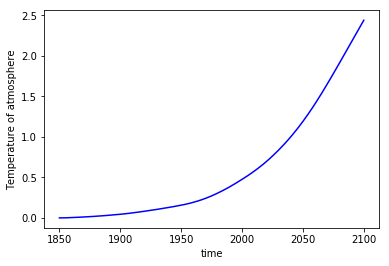

In [6]:
plt.plot(t, y[:, 0], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Temperature of atmosphere')

Text(0, 0.5, 'Carbon of atmosphere in ppm')

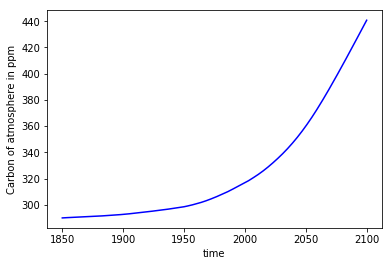

In [7]:
plt.plot(t, y[:, 1]*rho_a, 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Carbon of atmosphere in ppm')

Text(0, 0.5, 'Carbon of ocean in Gt')

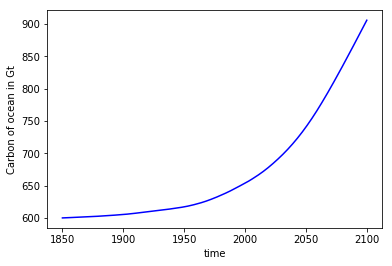

In [8]:
plt.plot(t, y[:, 2], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Carbon of ocean in Gt')

Text(0, 0.5, 'Carbon of deep ocean in Gt')

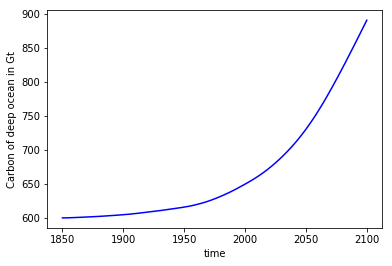

In [9]:
plt.plot(t, y[:, 3], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Carbon of deep ocean in Gt')

Text(0, 0.5, 'Temperature of ocean')

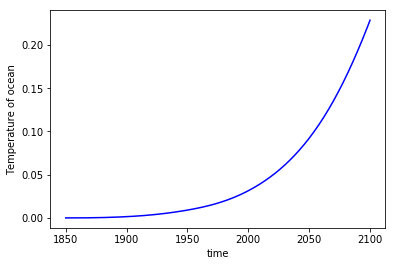

In [10]:
plt.plot(t, y[:, 4], 'b', label='theta(t)')
plt.xlabel('time')
plt.ylabel('Temperature of ocean')

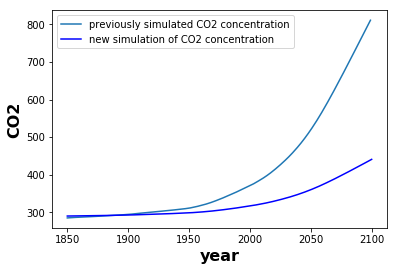

In [16]:
#Plot previously simulated CO2 concentration
mat = scipy.io.loadmat('CO2simulationRCPBAU85_SLR2012_Paris2015.mat')
Ram = mat['pco2a_vec_mit']
t1 = np.array(range(1850,2100))
plt.plot(t1,Ram[0],label='previously simulated CO2 concentration')
plt.xlabel('year',fontsize=16, fontweight='bold')
plt.ylabel('CO2',fontsize=16, fontweight='bold')
plt.plot(t, y[:, 1]*rho_a, 'b', label='new simulation of CO2 concentration')
plt.legend()

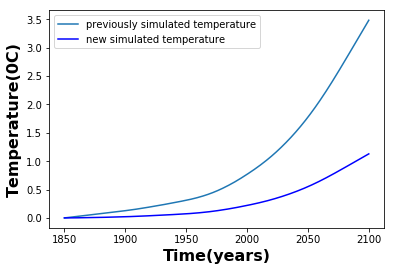

In [21]:
#plot of previously simulated temperature
f = lambda x: 5.4*(np.log(Ram[0][x]/280))
T41 = [0]
delaT = 1  * 3.154* (10**7)
H = 997 * 4187 * 300
lamb = 1.25
for i in range(250):
    Result = T41[i] + (delaT / H)*(f(i) - lamb*T41[i])
    T41.append(Result)
plt.plot(range(1850,2101),T41,label = 'previously simulated temperature')
plt.xlabel('Time(years)',fontsize=16, fontweight='bold')
plt.ylabel('Temperature(0C)',fontsize=16, fontweight='bold')
plt.plot(t, y[:, 0]*rho_a, 'b', label='new simulated temperature')
plt.legend()